## Primary Component Analysis
We use this notebook to show the reproducibility within each cell type by plotting primary component analysis.

First, we import our loader module. This brings the functions defined there (in our repository at ~/load_data.py) into scope so we can use them in this script. Then we can load our data and store it as <code>data_raw</code>.

In [1]:
import load_data
data_raw = load_data.load_max_quant()

Now we normalize the data. This function is defined in our data_utils.py file. See the Normalization notebook for further detail.

In [2]:
import data_utils
data = data_utils.normalize(data_raw)

When comparing data run at different times, there may be additional normalization necessary or filtering by those proteins identified at both times to accurately represent the biological variation. Here however, we compare data run only at one time point.

Here we call the PCA function from <code>sklearn</code>, wrapped in our plot_utils.py file. The function <code>PCA_by_type</code> returns a PCA plot to visualize the data.

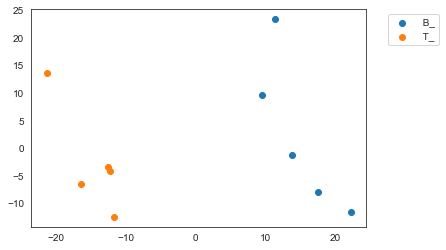

In [3]:
import plot_utils
figure = plot_utils.PCA_by_type(data, cell_types =[" B_"," T_"])

The cells group by type.